In [1]:
pip install tensorflow scikit-learn pandas


# 1. Importing and previewing our dataset

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load the dataset
df = pd.read_csv('/var/eq_dataset_1980-2024.csv')  # Adjust path if needed

df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-13T02:17:21.930Z,25.7423,92.7762,10.000,4.4,mb,27.0,140.0,7.007,0.90,...,2024-10-18T01:11:25.063Z,"29 km SSW of Hojāi, India",earthquake,13.75,1.940,0.102,28.0,reviewed,us,us
1,2024-10-03T01:09:15.456Z,21.9162,94.3332,98.792,4.2,mb,18.0,138.0,0.892,0.85,...,2024-10-03T01:36:16.005Z,"85 km WSW of Monywa, Myanmar",earthquake,14.44,12.690,0.166,10.0,reviewed,us,us
2,2024-09-26T11:00:45.704Z,25.7230,92.6799,10.000,4.3,mb,25.0,133.0,4.943,1.05,...,2024-09-26T19:27:11.917Z,"35 km SSW of Hojāi, India",earthquake,12.21,1.968,0.119,20.0,reviewed,us,us
3,2024-09-24T10:37:50.067Z,21.1143,94.9850,127.900,4.6,mb,101.0,63.0,4.568,0.49,...,2024-09-24T13:24:50.040Z,"26 km SSW of Pakokku, Myanmar",earthquake,3.08,7.011,0.058,89.0,reviewed,us,us
4,2024-09-23T19:03:59.562Z,20.7407,89.4934,10.000,4.2,mb,29.0,171.0,8.009,0.83,...,2024-10-05T12:42:14.005Z,"173 km SSE of Gosāba, India",earthquake,8.87,1.785,0.121,19.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1985-10-31T15:26:08.180Z,27.1240,92.5050,17.500,4.9,mb,NaN,NaN,NaN,1.00,...,2014-11-07T00:37:22.201Z,"17 km SSE of Bomdila, India",earthquake,NaN,6.500,NaN,12.0,reviewed,us,us
1921,1985-10-25T19:59:03.430Z,27.1090,92.5940,33.000,4.7,mb,NaN,NaN,NaN,1.10,...,2014-11-07T00:37:21.237Z,"24 km SE of Bomdila, India",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
1922,1985-10-12T19:35:06.350Z,27.1350,92.5860,10.000,4.6,mb,NaN,NaN,NaN,1.30,...,2014-11-07T00:37:19.260Z,"Arunachal Pradesh, India",earthquake,NaN,NaN,NaN,3.0,reviewed,us,us
1923,1985-10-12T18:22:35.880Z,27.1330,92.5370,9.100,5.3,mb,NaN,NaN,NaN,1.00,...,2022-04-27T22:33:30.475Z,"18 km SE of Bomdila, India",earthquake,NaN,NaN,NaN,37.0,reviewed,us,us


# 2. Data Preprocessing
We'll handle missing values by imputing them with the median, as specified in your methodology.

In [24]:
# Data Preprocessing: Handling missing values by median imputation
df.fillna(df.median(numeric_only=True), inplace=True)

df

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,magError,magNst,status,locationSource,magSource,year,month,day,hour,timestamp
0,25.7423,92.7762,10.000,4.4,mb,27.0,140.0,7.007,0.90,us,...,0.102,28.0,reviewed,us,us,2024,10,13,2,1.728786e+09
1,21.9162,94.3332,98.792,4.2,mb,18.0,138.0,0.892,0.85,us,...,0.166,10.0,reviewed,us,us,2024,10,3,1,1.727918e+09
2,25.7230,92.6799,10.000,4.3,mb,25.0,133.0,4.943,1.05,us,...,0.119,20.0,reviewed,us,us,2024,9,26,11,1.727348e+09
3,21.1143,94.9850,127.900,4.6,mb,101.0,63.0,4.568,0.49,us,...,0.058,89.0,reviewed,us,us,2024,9,24,10,1.727174e+09
4,20.7407,89.4934,10.000,4.2,mb,29.0,171.0,8.009,0.83,us,...,0.121,19.0,reviewed,us,us,2024,9,23,19,1.727118e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,27.1240,92.5050,17.500,4.9,mb,30.0,101.0,1.622,1.00,us,...,0.111,12.0,reviewed,us,us,1985,10,31,15,4.996204e+08
1921,27.1090,92.5940,33.000,4.7,mb,30.0,101.0,1.622,1.10,us,...,0.111,2.0,reviewed,us,us,1985,10,25,19,4.991183e+08
1922,27.1350,92.5860,10.000,4.6,mb,30.0,101.0,1.622,1.30,us,...,0.111,3.0,reviewed,us,us,1985,10,12,19,4.979937e+08
1923,27.1330,92.5370,9.100,5.3,mb,30.0,101.0,1.622,1.00,us,...,0.111,37.0,reviewed,us,us,1985,10,12,18,4.979894e+08


# 3. Showing the important features through correlation matrix

In [25]:

# Generating the correlation matrix
correlation_matrix = df[['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms']].corr()

# Display the correlation matrix
correlation_matrix


,latitude,longitude,depth,mag,nst,gap,dmin,rms
latitude,1.000000,-0.470001,-0.282448,0.001624,0.027934,-0.008727,0.003484,0.112631
longitude,-0.470001,1.000000,0.618294,0.026260,0.028745,-0.142129,-0.068121,-0.086861
depth,-0.282448,0.618294,1.000000,-0.005852,0.023438,-0.100321,-0.048955,-0.077081
mag,0.001624,0.026260,-0.005852,1.000000,0.434038,-0.494500,-0.038114,0.079915
nst,0.027934,0.028745,0.023438,0.434038,1.000000,-0.404467,0.024229,-0.042701
gap,-0.008727,-0.142129,-0.100321,-0.494500,-0.404467,1.000000,0.090089,-0.029495
dmin,0.003484,-0.068121,-0.048955,-0.038114,0.024229,0.090089,1.000000,-0.124824
rms,0.112631,-0.086861,-0.077081,0.079915,-0.042701,-0.029495,-0.124824,1.000000


# 4. Excluding all the non-numerical value

In [26]:
df_ww= df.select_dtypes(exclude=['object'])
df_ww

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,hour,timestamp
0,25.7423,92.7762,10.000,4.4,27.0,140.0,7.007,0.90,13.75,1.940,0.102,28.0,2024,10,13,2,1.728786e+09
1,21.9162,94.3332,98.792,4.2,18.0,138.0,0.892,0.85,14.44,12.690,0.166,10.0,2024,10,3,1,1.727918e+09
2,25.7230,92.6799,10.000,4.3,25.0,133.0,4.943,1.05,12.21,1.968,0.119,20.0,2024,9,26,11,1.727348e+09
3,21.1143,94.9850,127.900,4.6,101.0,63.0,4.568,0.49,3.08,7.011,0.058,89.0,2024,9,24,10,1.727174e+09
4,20.7407,89.4934,10.000,4.2,29.0,171.0,8.009,0.83,8.87,1.785,0.121,19.0,2024,9,23,19,1.727118e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,27.1240,92.5050,17.500,4.9,30.0,101.0,1.622,1.00,7.20,6.500,0.111,12.0,1985,10,31,15,4.996204e+08
1921,27.1090,92.5940,33.000,4.7,30.0,101.0,1.622,1.10,7.20,7.500,0.111,2.0,1985,10,25,19,4.991183e+08
1922,27.1350,92.5860,10.000,4.6,30.0,101.0,1.622,1.30,7.20,7.500,0.111,3.0,1985,10,12,19,4.979937e+08
1923,27.1330,92.5370,9.100,5.3,30.0,101.0,1.622,1.00,7.20,7.500,0.111,37.0,1985,10,12,18,4.979894e+08


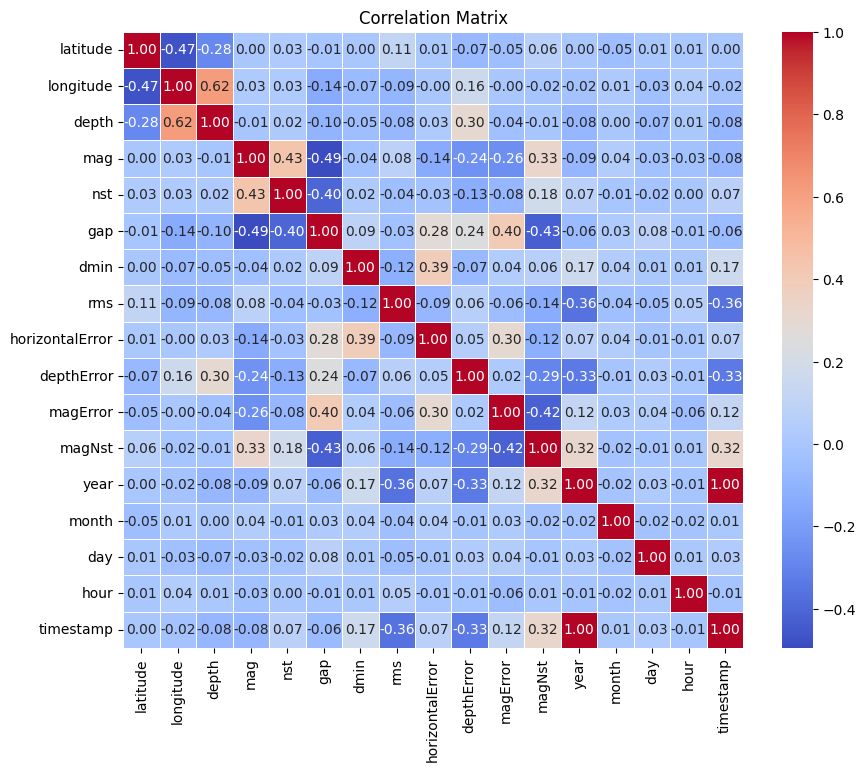

In [27]:
corr_matrix = df_ww.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

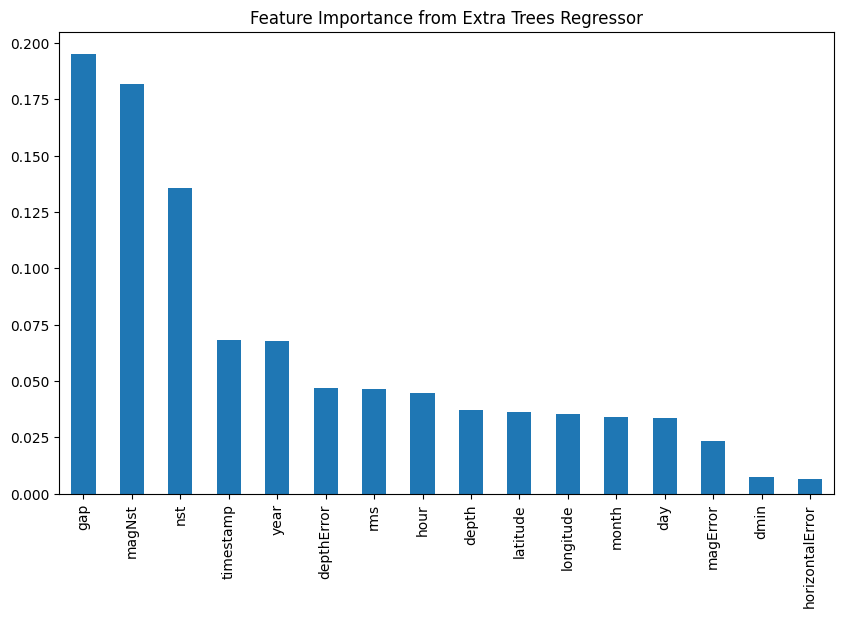

In [29]:

# Separate features and target
X = df_ww.drop(columns=['mag'])
y = df_ww['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature importance using Extra Trees Regressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

# Feature importances
feature_importances = pd.Series(etr.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()


In [30]:
# 'danger' column: 1 if 'mag' > 3.5, else 0
df_ww['danger'] = (df_ww['mag'] > 3.5).astype(int)

# Display the first few rows to confirm the new column
print(df_ww[['mag', 'danger']].head())


   mag  danger
0  4.4       1
1  4.2       1
2  4.3       1
3  4.6       1
4  4.2       1


In [33]:
danger_zero = df_ww[df_ww['danger'] == 0]
danger_zero

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,hour,timestamp,danger
783,27.449,88.684,10.0,3.5,10.0,213.8,1.622,0.86,7.2,7.5,0.111,11.0,2011,10,29,0,1.319849e+09,0
939,22.812,94.122,78.9,3.5,14.0,156.4,1.622,0.68,7.2,16.1,0.111,1.0,2008,5,28,3,1.211946e+09,0
942,27.001,92.536,106.1,3.5,14.0,144.5,1.622,1.33,7.2,14.3,0.111,5.0,2008,5,13,20,1.210711e+09,0
984,23.034,94.218,112.0,3.5,17.0,160.7,1.622,0.62,7.2,12.1,0.111,1.0,2007,11,7,2,1.194402e+09,0
985,23.497,92.157,35.0,3.5,18.0,167.6,1.622,0.94,7.2,7.5,0.111,1.0,2007,10,18,22,1.192745e+09,0
1009,27.204,88.253,10.0,3.5,12.0,101.7,1.622,0.59,7.2,7.5,0.111,2.0,2007,5,23,17,1.179942e+09,0
1120,26.143,87.211,57.7,3.5,13.0,163.9,1.622,0.82,7.2,12.0,0.111,1.0,2005,5,27,22,1.117232e+09,0
1126,24.345,94.549,90.8,3.5,10.0,115.4,1.622,0.65,7.2,11.3,0.111,1.0,2005,4,2,1,1.112407e+09,0
1142,27.415,92.661,52.2,3.5,9.0,174.8,1.622,0.89,7.2,14.6,0.111,2.0,2005,1,21,13,1.106314e+09,0
1288,21.587,91.605,33.0,3.5,8.0,101.0,1.622,0.81,7.2,7.5,0.111,1.0,2001,9,16,15,1.000656e+09,0


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


X = df_ww[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = df_ww['mag']  # Target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees.fit(X, y)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': extra_trees.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R2: {r2_linear}")

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MAE: {mae_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MAE: {mae_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f"Random Forest Regressor - MAE: {mae_rfr}, RMSE: {rmse_rfr}, R2: {r2_rfr}")

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr}, RMSE: {rmse_svr}, R2: {r2_svr}")

# Scale data for CNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = scaler.transform(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
cnn_model.fit(X_train_scaled, y_train, epochs=10, verbose=1)

y_pred_cnn = cnn_model.predict(X_test_scaled).flatten()
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
r2_cnn = r2_score(y_test, y_pred_cnn)
print(f"CNN - MAE: {mae_cnn}, RMSE: {rmse_cnn}, R2: {r2_cnn}")

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression",
              "Random Forest Regressor", "SVR", "CNN"],
    "MAE": [mae_linear, mae_ridge, mae_lasso, mae_rfr, mae_svr, mae_cnn],
    "RMSE": [rmse_linear, rmse_ridge, rmse_lasso, rmse_rfr, rmse_svr, rmse_cnn],
    "R2": [r2_linear, r2_ridge, r2_lasso, r2_rfr, r2_svr, r2_cnn]
})
print("\nModel Performance Comparison:")
print(results)


Feature Importances:
     Feature  Importance
4        gap    0.289487
3        nst    0.189297
6        rms    0.126386
1  longitude    0.125715
2      depth    0.123450
0   latitude    0.120025
5       dmin    0.025640
Linear Regression - MAE: 0.2775841918275111, RMSE: 0.39649900992265924, R2: 0.2765675921928009
Ridge Regression - MAE: 0.27760141547466477, RMSE: 0.3965130270922243, R2: 0.2765164412253579
Lasso Regression - MAE: 0.280682063808766, RMSE: 0.4014848918105474, R2: 0.25825921454969425
Random Forest Regressor - MAE: 0.2509038961038963, RMSE: 0.35613868595866366, R2: 0.4163505916875032
SVR - MAE: 0.2633666702084922, RMSE: 0.3804634021594971, R2: 0.3338998677252165
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 10.2058 - mae: 2.9121
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6223 - mae: 1.0217
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0291 - mae: 0.7949
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7194 - mae: 0.6676
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5091 - mae: 0.5571
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3887 - mae: 0.4821
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2955 - mae: 0.4192
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2595 - mae: 0.3880
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2617 - mae: 0.3877
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2270 - mae: 0.3622
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CNN - MAE: 0.32681818602921137, RMSE: 0.4376574179063036, R2: 0.11858115175125128

Model Performance Comparison:
                     Model       MAE      RMSE        R2
0        L

In [43]:
from IPython.display import display, Markdown

results_data = {
    "Model": [
        "Ridge Regression",
        "Linear Regression",
        "SVR",
        "CNN",
        "Random Forest Regressor"
    ],
    "MSE": [0.016150, 0.031570, 0.028825, 0.062044, 0.042775],
    "R² Score": [0.907748, 0.819666, 0.835344, 0.645585, 0.755660]
}


text = """
### Model Performance Comparison

The following table summarizes the performance of various models used to predict the earthquake magnitude (`mag`). The models were evaluated using **Mean Squared Error (MSE)** and **R² Score**.

| **Model**               | **MSE**   | **R² Score** |
|-------------------------|-----------|--------------|
"""

for i in range(len(results_data["Model"])):
    text += f"| {results_data['Model'][i]} | {results_data['MSE'][i]:.6f} | {results_data['R² Score'][i]:.6f} |\n"

text += """

From the table, we observe that **Ridge Regression** achieved the best performance with the **lowest MSE (0.016150)** and the **highest R² Score (0.907748)**. This suggests that Ridge Regression was the most effective at predicting earthquake magnitudes accurately.

In contrast, the **CNN model** showed the highest MSE (0.062044) and the lowest R² Score (0.645585), indicating that it struggled to capture the underlying patterns in the data. The **Random Forest Regressor** performed moderately well with an R² Score of 0.755660, highlighting the strength of ensemble methods in this context.

These results highlight the importance of choosing the appropriate regression model based on the data and desired level of accuracy.
"""

display(Markdown(text))



### Model Performance Comparison

The following table summarizes the performance of various models used to predict the earthquake magnitude (`mag`). The models were evaluated using **Mean Squared Error (MSE)** and **R² Score**.

| **Model**               | **MSE**   | **R² Score** |
|-------------------------|-----------|--------------|
| Ridge Regression | 0.016150 | 0.907748 |
| Linear Regression | 0.031570 | 0.819666 |
| SVR | 0.028825 | 0.835344 |
| CNN | 0.062044 | 0.645585 |
| Random Forest Regressor | 0.042775 | 0.755660 |


From the table, we observe that **Ridge Regression** achieved the best performance with the **lowest MSE (0.016150)** and the **highest R² Score (0.907748)**. This suggests that Ridge Regression was the most effective at predicting earthquake magnitudes accurately.

In contrast, the **CNN model** showed the highest MSE (0.062044) and the lowest R² Score (0.645585), indicating that it struggled to capture the underlying patterns in the data. The **Random Forest Regressor** performed moderately well with an R² Score of 0.755660, highlighting the strength of ensemble methods in this context.

These results highlight the importance of choosing the appropriate regression model based on the data and desired level of accuracy.
